# Captone Project

### Import Dependencies

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

### Import CSV files

In [45]:
df = pd.read_csv('Data/heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


From the following table, we can see there's 918 rows from which each represent a different person. Must of the columns are of integer type, but we'll also be focusing on **HeartDisease** column which can be considered of boolean type.

In [46]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Categorical Plot

First off, we'll be creating a simple count plot to show how many different cases of heart disease we have on our dataset

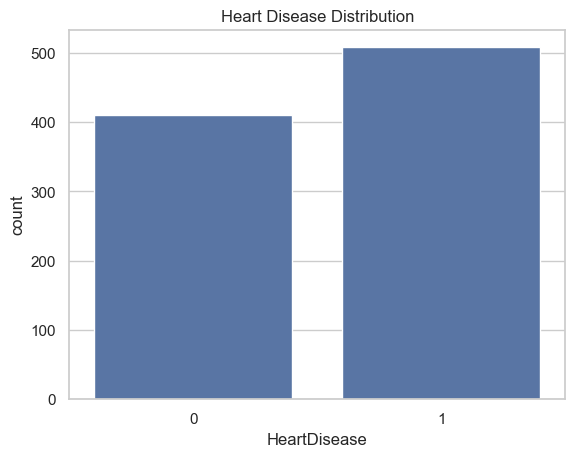

In [47]:
# Create a graphic for people who have and don't have heart diseases
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution')
plt.show()

Now lets clean a little bit our data for our next plot, which will be showing a bar chart illustrating the difference between men and women with heart disease using their age as X-axis value

In [48]:
# Create age bins
age_bins = pd.cut(df['Age'], bins=np.arange(0, df['Age'].max() + 10, 10))

# Create a new DataFrame with the age bins
df['AgeBin'] = age_bins

# Group by the new age bins and Sex
age_heart_disease_df = df.groupby(['AgeBin', 'Sex']).sum().reset_index()

# Sort the age bins
sorted_age_bins = sorted(df['AgeBin'].unique())

C:\Users\pmoralessantamari\AppData\Local\Temp\ipykernel_26492\731235844.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_heart_disease_df = df.groupby(['AgeBin', 'Sex']).sum().reset_index()


In [49]:
# Create lists for the number of heart disease cases
fem = []
mas = []
age_bin_labels = []

# Iterate through the unique age bins and sexes
for age_bin in sorted_age_bins:
    age_bin_labels.append(str(age_bin))
    fem_count = age_heart_disease_df[(age_heart_disease_df['AgeBin'] == age_bin) & (age_heart_disease_df['Sex'] == 'F')]['HeartDisease'].sum()
    mas_count = age_heart_disease_df[(age_heart_disease_df['AgeBin'] == age_bin) & (age_heart_disease_df['Sex'] == 'M')]['HeartDisease'].sum()
    fem.append(fem_count)
    mas.append(mas_count)

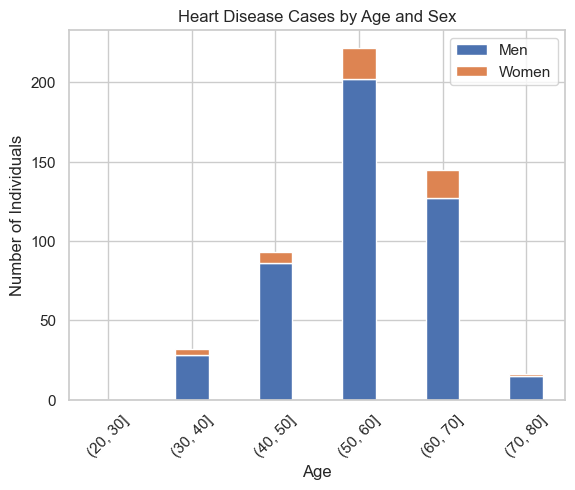

In [50]:
# Define the X-axis positions for the bins
X_axis = np.arange(len(age_bin_labels))

# Plot the stacked bar chart
plt.bar(X_axis, mas, 0.4, label='Men')
plt.bar(X_axis, fem, 0.4, bottom=mas, label='Women')

# Set the tick positions and labels
plt.xticks(X_axis, age_bin_labels, rotation=45)
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.title('Heart Disease Cases by Age and Sex')
plt.legend()
plt.show()

### Choresterol and HeartDisease

In the following graph, we see the relationship between cholesterol and heart disease.

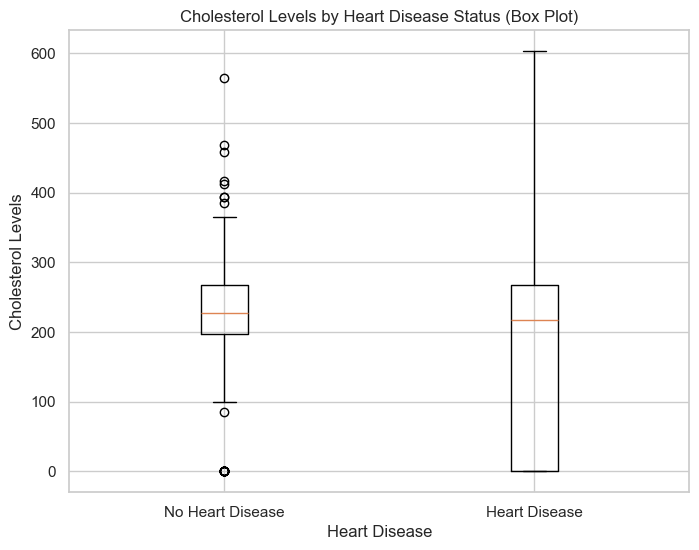

In [51]:
# Create separate Series for cholesterol levels for individuals with and without heart disease
cholesterol_heart_disease = df[df['HeartDisease'] == 1]['Cholesterol']
cholesterol_no_heart_disease = df[df['HeartDisease'] == 0]['Cholesterol']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([cholesterol_no_heart_disease, cholesterol_heart_disease], labels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Levels')
plt.title('Cholesterol Levels by Heart Disease Status (Box Plot)')
plt.grid(True)
plt.show()

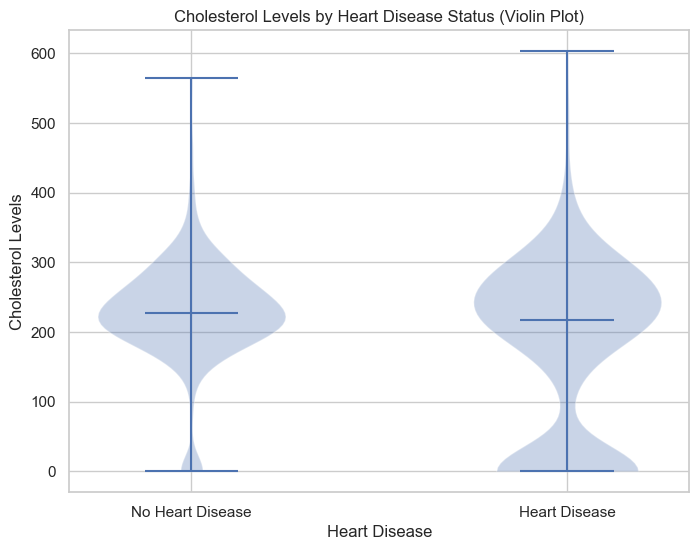

In [52]:
# Or a violin plot for a denser representation
plt.figure(figsize=(8, 6))
plt.violinplot([cholesterol_no_heart_disease, cholesterol_heart_disease], showmedians=True)
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Levels')
plt.title('Cholesterol Levels by Heart Disease Status (Violin Plot)')
plt.grid(True)
plt.show()

 We can observe that lower cholesterol levels make it less likely for people to develop heart disease, conversely, higher cholesterol levels correlate with a greater propensity for heart disease.

### ST-Slope and HeartDisease

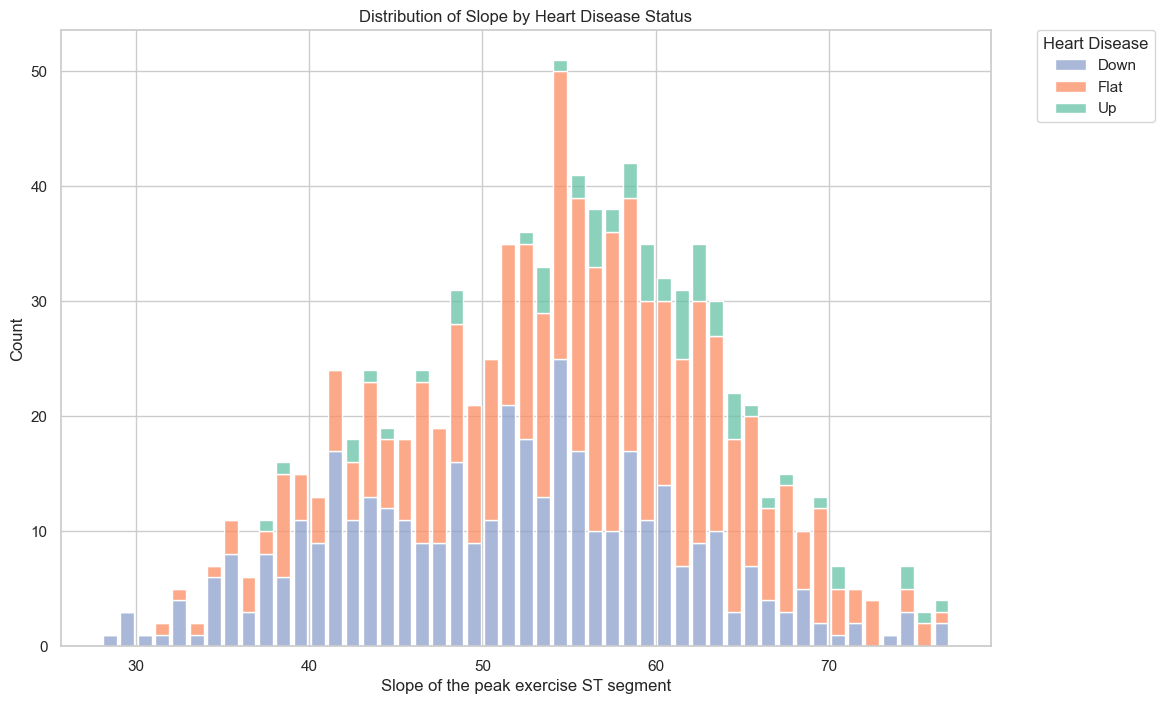

In [53]:
# Group data by 'Age', 'HeartDisease', and 'ST_Slope', and count occurrences
slope_heart_disease_age = df.groupby(['Age', 'HeartDisease', 'ST_Slope']).size().unstack(fill_value=0)

# Reset index to flatten the multi-index structure
slope_heart_disease_age = slope_heart_disease_age.reset_index()

# Plot the stacked bar chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# Melt the DataFrame to have one column for each 'HeartDisease'
melted_df = pd.melt(slope_heart_disease_age, id_vars=['Age'], value_vars=['Down', 'Flat', 'Up'], var_name='HeartDisease', value_name='Count')

# Explicitly define the order and labels for the hue categories
hue_order = ['Down', 'Flat', 'Up']
hue_labels = ['Down', 'Flat', 'Up']

# Plot the stacked bar chart using sns.histplot instead of sns.barplot
sns.histplot(data=melted_df, x='Age', hue='HeartDisease', weights='Count', multiple='stack', palette='Set2', shrink=0.8, binwidth=1, hue_order=hue_order)

plt.xlabel('Slope of the peak exercise ST segment')
plt.ylabel('Count')
plt.title('Distribution of Slope by Heart Disease Status')

# Adjust legend properties
plt.legend(title='Heart Disease', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labels=hue_labels)

plt.show()

From the previous graph, it's natural to assume that flat and down ST-sloping is strongly related to heart diseases, while up ST-sloping is not common on heart diseases. 

According to PubMed (Jpn Heart J., 1997), Down and Flat ST-Slope is associated with different types of ischemia.

![ST segment depression](https://litfl.com/wp-content/uploads/2018/10/ST-segment-depression-upsloping-downsloping-horizontal.png)

###### Image provided by **Life in the Fastlane** https://litfl.com/st-segment-ecg-library/

### Dataset Transformation and Cleaning

In [54]:
df["Sex"] = df["Sex"].map(lambda  x : 1 if x == "M" else 0)
df["ExerciseAngina"] = df["ExerciseAngina"].map(lambda  x : 1 if x == "Y" else 0)

In [55]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeBin
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0,"(30, 40]"
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1,"(40, 50]"
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0,"(30, 40]"
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1,"(40, 50]"
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0,"(50, 60]"


In [56]:
enriched_df = df.drop(["ST_Slope"], axis = 1).join(pd.get_dummies(df.ST_Slope, dtype=float))
enriched_df = enriched_df.drop(["RestingECG"], axis = 1).join(pd.get_dummies(enriched_df.RestingECG, dtype=float))
enriched_df = enriched_df.drop(["ChestPainType"], axis = 1).join(pd.get_dummies(enriched_df.ChestPainType, dtype=float))
enriched_df = enriched_df.drop(['AgeBin'], axis=1)

In [57]:
enriched_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Down,Flat,Up,LVH,Normal,ST,ASY,ATA,NAP,TA
0,40,1,140,289,0,172,0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49,0,160,180,0,156,0,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,130,283,0,98,0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,48,0,138,214,0,108,1,1.5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,54,1,150,195,0,122,0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [58]:
enriched_df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Down,Flat,Up,LVH,Normal,ST,ASY,ATA,NAP,TA
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377,0.068627,0.501089,0.430283,0.204793,0.601307,0.193900,0.540305,0.188453,0.221133,0.050109
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414,0.252957,0.500271,0.495386,0.403770,0.489896,0.395567,0.498645,0.391287,0.415236,0.218289
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Statistics

In [59]:
for col in enriched_df.columns:
    print(col, np.corrcoef(enriched_df.HeartDisease, enriched_df[col])[0][1])

Age 0.2820385058189974
Sex 0.3054449159631404
RestingBP 0.10758898037140403
Cholesterol -0.2327406389270117
FastingBS 0.26729118611029834
MaxHR -0.4004207694631903
ExerciseAngina 0.4942819918242686
Oldpeak 0.40395072206288646
HeartDisease 1.0
Down 0.1225266764064919
Flat 0.5541335908840072
Up -0.622164208395995
LVH 0.010670195926114637
Normal -0.09157996051345976
ST 0.10252722218986657
ASY 0.5167164574900891
ATA -0.40192405291466793
NAP -0.2129636250394063
TA -0.05479026202691404


### Model

In [60]:
y = enriched_df.HeartDisease
X = enriched_df.drop("HeartDisease", axis=1)

In [61]:
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     81.59
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          3.35e-156
Time:                        22:10:12   Log-Likelihood:                -267.50
No. Observations:                 918   AIC:                             567.0
Df Residuals:                     902   BIC:                             644.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1446      0.073      1.